<a href="https://colab.research.google.com/github/gowtham66866/Inkers/blob/master/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [21]:
# https://keras.io/
!pip install -q keras
from keras import backend as K
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.utils import np_utils


# Multiple Inputs
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D,SeparableConv2D,DepthwiseConv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras import regularizers
from keras.layers.normalization import BatchNormalization
print(datetime.datetime.now())

2019-06-15 21:14:46.884510


In [22]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-15 21:14:46.901400


### Load pre-shuffled MNIST data into train and test sets

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-06-15 21:14:47.415361


(60000, 28, 28)
2019-06-15 21:14:47.486146


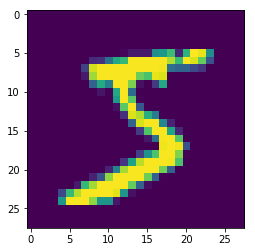

In [24]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [25]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-15 21:14:47.837313


In [26]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-15 21:14:48.138281


In [27]:
y_train[:10]
print(datetime.datetime.now())

2019-06-15 21:14:48.162053


In [28]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-15 21:14:48.189435


In [29]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-15 21:14:48.201890


In [30]:
## MAIN BLOCK

from keras.layers import Activation
model = Sequential()

weight_decay = 0.005

# Input layer
img = Input(shape=(32,32,3))

# first convolution block
x = Conv2D(64, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(img) #32
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  
x = Conv2D(64, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #32
x = BatchNormalization()(x)
x = Dropout(0.4)(x) 

# first transition block with bottlneck
x = MaxPooling2D(pool_size=(2, 2))(x) #16
x = Conv2D(64, kernel_size=1, activation='relu')(x)



# second convolution block
#******************************************GROUPED CONVOLUTION*************
x = Conv2D(128, kernel_size=3, padding='same',dilation_rate=(1, 1), activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #16
x = BatchNormalization()(x)
x = Dropout(0.4)(x) 

# Dilated Convolutino with dilation rate of 2
x1 = Conv2D(512, kernel_size=3, padding='same', dilation_rate=(2, 2), activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #4
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)

x = concatenate([x1, x])
x = Conv2D(512, kernel_size=1, activation='relu')(x)
#*******************************************************************************
x = Conv2D(128, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #16
x = BatchNormalization()(x)
x = Dropout(0.4)(x) 

# second transition block with bottlneck
x = MaxPooling2D(pool_size=(2, 2))(x) #8
x = Conv2D(64, kernel_size=1, activation='relu')(x)


# third convolution block
x = Conv2D(256, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #8
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  
# ******************spacial separable convolution****************************
# x = Conv2D(256, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #8
x = Conv2D(256, kernel_size=(3,1), padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #8
x = Conv2D(256, kernel_size=(1,3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #8
# **************************************************************************************
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2D(256, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #8
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# third transition block with bottlneck
x = MaxPooling2D(pool_size=(2, 2))(x) #4
x = Conv2D(64, kernel_size=1, activation='relu')(x)

# fourth convolution block
#******************************************GROUPED CONVOLUTION*************
x = Conv2D(512, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #4
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x1 = Conv2D(512, kernel_size=5, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #4
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)


x = Conv2D(512, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #4
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# print("test",np.shape(concatenate([x1, x])))

x = concatenate([x1, x])
x = Conv2D(512, kernel_size=1, activation='relu')(x)
#****************************************************************************************


# fourth transition block with bottlneck
x = MaxPooling2D(pool_size=(2, 2))(x) #2
x = Conv2D(64, kernel_size=1, activation='relu')(x)

# fifth convolution block
x = Conv2D(512, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #2
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  
# ***************************Depthwise seperable convolution **************************
x = SeparableConv2D(512, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #2
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# fifth transition block with bottlneck
x = MaxPooling2D(pool_size=(2, 2))(x) #1
x = Conv2D(64, kernel_size=1, activation='relu')(x)


# final convolution block
x = Conv2D(512, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x) #1
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  
x = Conv2D(10, kernel_size=3, padding='same')(x) #1

x = Flatten()(x)
output = Activation('softmax')(x)


model = Model(inputs=[img], outputs=output)
# summarize layers
print(model.summary())

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 32, 32, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 32, 32, 64)   256         conv2d_23[0][0]                  
__________________________________________________________________________________________________
dropout_15 (Dropout)            (None, 32, 32, 64)   0           batch_normalization_15[0][0]     
__________________________________________________________________________________________________
conv2d_24 

In [31]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 32, 32, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 32, 32, 64)   256         conv2d_23[0][0]                  
__________________________________________________________________________________________________
dropout_15 (Dropout)            (None, 32, 32, 64)   0           batch_normalization_15[0][0]     
__________________________________________________________________________________________________
conv2d_24 

In [32]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-15 21:14:52.036315


In [33]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

In [0]:
print(score)
print(datetime.datetime.now())